# 🧠 Business Understanding

## 🔹 1. Project Overview
Walmart, one of the largest retail chains in the world, operates hundreds of stores across various locations and departments. Analyzing its historical sales data can help uncover valuable insights into store performance, the impact of external factors (like holidays and fuel prices), and customer purchasing behavior. 

The goal of this project is to analyze and visualize Walmart’s sales data to support data-driven decision-making across store management, inventory planning, and marketing.

---

## 🔹 2. Problem Statement
Walmart’s sales performance varies across different stores and time periods, and is influenced by external factors such as holidays, fuel prices, and weather conditions. However, decision-makers lack a consolidated view of these insights.

**How can we identify patterns, trends, and anomalies in Walmart’s historical sales data to support strategic planning and operational decisions?**

---

## 🔹 3. Project Objectives
- Perform exploratory data analysis (EDA) to understand sales patterns and key influencing factors.
- Identify top-performing stores and departments.
- Analyze the impact of holidays and seasons on sales.
- Build interactive dashboards (Python, Tableau, Power BI) for decision-makers.
- *(Optional)* Forecast future sales based on historical patterns.

---

## 🔹 4. Metrics for Success

### ✅ Descriptive Insight Metrics:
- Clear identification of trends, outliers, and seasonality.
- Top/bottom performing stores and departments.
- Correlation of external factors (like holidays and fuel prices) with sales.

### ✅ Visualization & Usability Metrics:
- Dashboards in Tableau and Power BI that allow users to slice and drill into data by date, department, or store.
- Visual clarity and interactivity of Python plots.

### ✅ (Optional) Predictive Metrics:
- Accuracy of sales forecasts (e.g., RMSE or MAPE).
- Precision in anomaly detection or classification tasks if any.


# 📊 Data Understanding Summary

## 🔹 Dataset Overview
- **Total Records:** 6,435
- **Columns:** 8


---

## 🔹 Columns & Observations

| Column           | Type    | Notes |
|------------------|---------|-------|
| `Store_Number`   | int64   | Unique store identifier |
| `Date`           | object  | Needs conversion to datetime |
| `Weekly_Sales`   | object  | Stored as string with commas → needs conversion to numeric |
| `Holiday_Flag`   | int64   | 0 = Normal week, 1 = Holiday week |
| `Temperature`    | float64 | Average weekly temperature |
| `Fuel_Price`     | float64 | Fuel cost per gallon |
| `CPI`            | int64   | Consumer Price Index (note: should be float, also column name has extra space) |
| `Unemployment`   | float64 | Unemployment rate (%) |

---

## 🔹 Immediate Actions Needed
1. 🔄 Convert `Weekly_Sales` from string to numeric (remove commas).
2. 📅 Convert `Date` to datetime format.
3. 🧹 Rename `" CPI"` column to `"CPI"` (remove leading space).
4. 📈 Proceed to univariate and bivariate EDA.



## Exploring the dataset

In [34]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# loading the dataset
df = pd.read_csv('Walmart_sales_analysis.csv')

df.head(10)

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,"1,643,691",0,42.31,2.572,211,8.106
1,1,2/12/2010,"1,641,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"1,611,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"1,409,728",0,46.63,2.561,211,8.106
4,1,3/5/2010,"1,554,807",0,46.50,2.625,211,8.106
5,1,3/12/2010,"1,439,542",0,57.79,2.667,211,8.106
6,1,3/19/2010,"1,472,516",0,54.58,2.720,211,8.106
7,1,3/26/2010,"1,404,430",0,51.45,2.732,211,8.106
8,1,4/2/2010,"1,594,968",0,62.27,2.719,211,7.808
9,1,4/9/2010,"1,545,419",0,65.86,2.770,211,7.808


In [36]:
df.shape

(6435, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Number,6435.0,23.000000,12.988182,1.000,12.000,23.000,34.000,45.000
Holiday_Flag,6435.0,0.069930,0.255049,0.000,0.000,0.000,0.000,1.000
Temperature,6435.0,60.663782,18.444933,-2.060,47.460,62.670,74.940,100.140
Fuel_Price,6435.0,3.358607,0.459020,2.472,2.933,3.445,3.735,4.468
CPI,6435.0,171.583994,39.351305,126.000,132.000,183.000,213.000,227.000
Unemployment,6435.0,7.999151,1.875885,3.879,6.891,7.874,8.622,14.313


In [39]:
df.describe(include='O').T

,count,unique,top,freq
Date,6435,143,2/5/2010,45
Weekly_Sales,6435,6427,"1,361,945",2


## Data Preparation

### Data Cleaning

In [40]:
#Changing cases to lower
df.columns = df.columns.str.lower()

In [41]:
# Dropping unnecessary columns
df.drop(columns=['store_number'],axis=1,inplace=True)

In [42]:
# checking for missing values
df.isnull().sum().any()

False

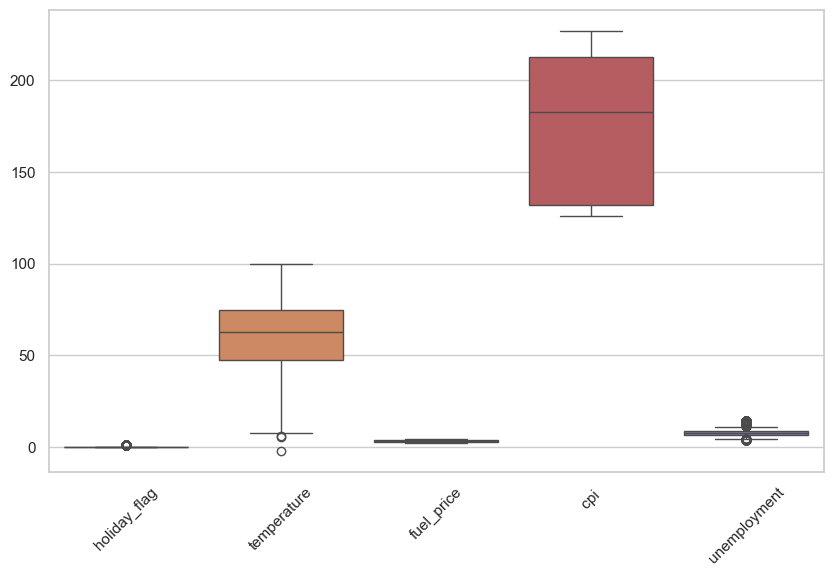

In [43]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [44]:
# Eliminating the outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    

In [45]:
# Checking for duplicates
df.duplicated().sum()

0

## Feature Engineering

In [46]:
# Changing sales column to int
# Remove commas and convert to float
df['weekly_sales'] = df['weekly_sales'].str.replace(",", "").astype(float)


In [47]:
# Changing column to datetime
df['date']= pd.to_datetime(df['date'])

In [48]:
# Converting to different formats
df['year']=df['date'].dt.year
df['hour']=df['date'].dt.hour
df['day']=df['date'].dt.day_of_week
df['month']=df['date'].dt.month

In [49]:
import calendar

# Create mapping: 1 → January, 2 → February, ..., 12 → December
month_map = {i: calendar.month_name[i] for i in range(1, 13)}

# Apply to your DataFrame
df['month'] = df['month'].map(month_map)


In [50]:
# Converting holiday flag column to string
df['holiday_flag'] = df['holiday_flag'].astype(str)
df['holiday_flag'] = df['holiday_flag'].str.replace('0', 'normal week')
df['holiday_flag'] = df['holiday_flag'].str.replace('1', 'holiday week')


In [51]:
# Confirming the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6435 non-null   datetime64[ns]
 1   weekly_sales  6435 non-null   float64       
 2   holiday_flag  6435 non-null   object        
 3   temperature   6435 non-null   float64       
 4   fuel_price    6435 non-null   float64       
 5    cpi          6435 non-null   int64         
 6   unemployment  6435 non-null   float64       
 7   year          6435 non-null   int32         
 8   hour          6435 non-null   int32         
 9   day           6435 non-null   int32         
 10  month         6435 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(2)
memory usage: 477.7+ KB


In [52]:
# Saving the modified dataset
df.to_csv('walmart.csv')

# Exploratory Data Analysis


## Univariate Anaylsis

### Numeric Columns

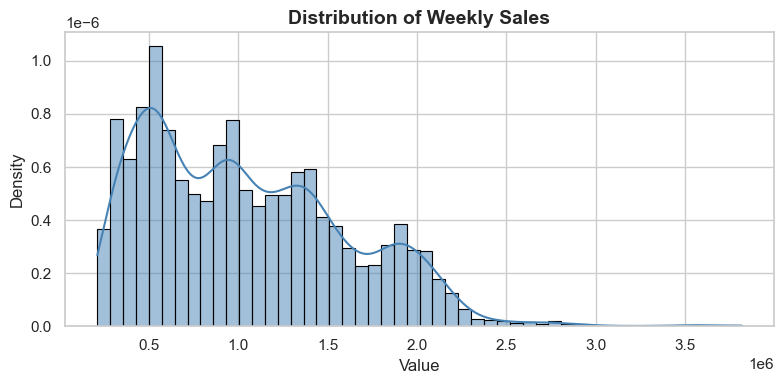

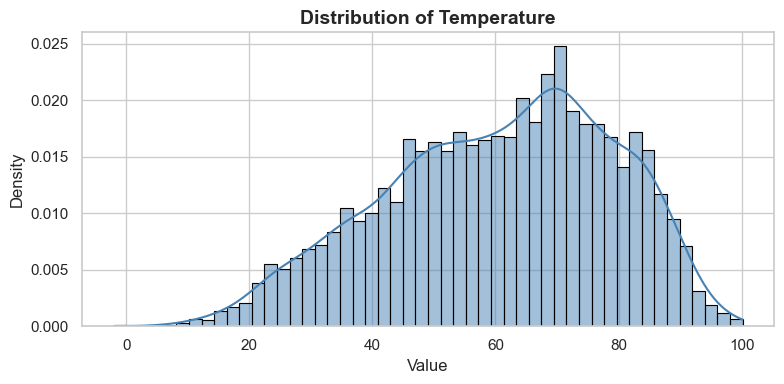

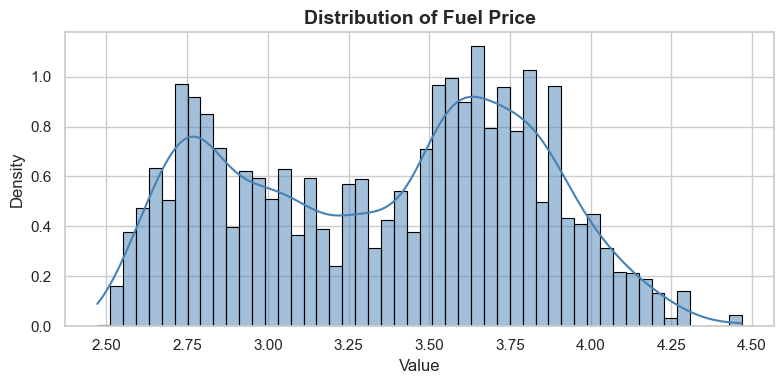

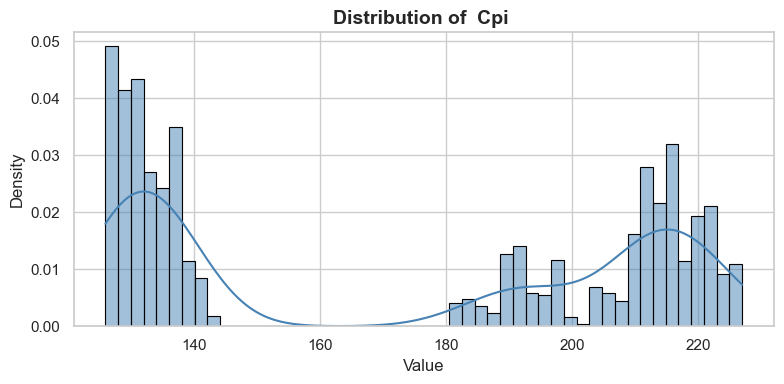

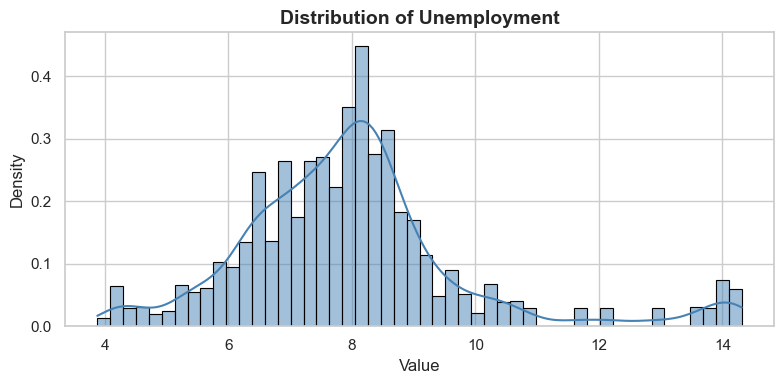

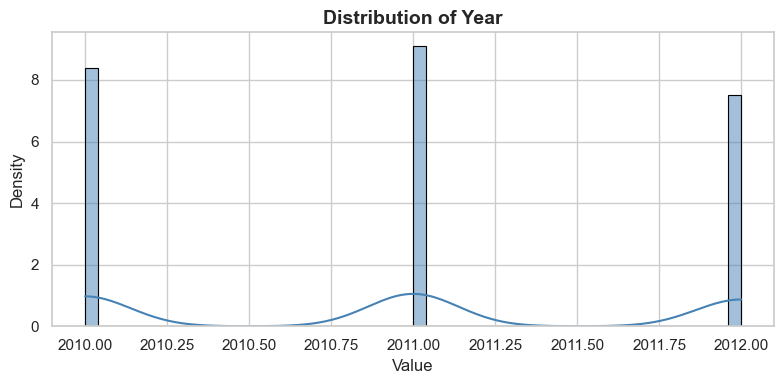

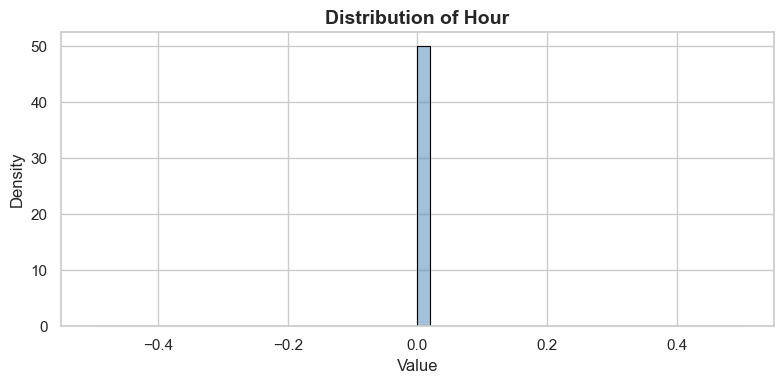

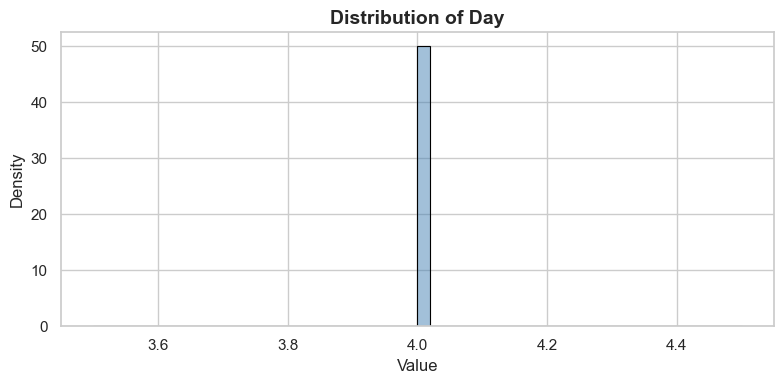

In [53]:
# Select all numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns

# Set style
sns.set(style="whitegrid")

# Plot distributions
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].fillna(0), bins=50, kde=True, stat="density", color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14,fontweight='bold')
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()


**Observations**
- Weekly_Sales likely has a right-skewed distribution, indicating a few weeks with exceptionally high sales compared to the majority.
- Temperature and Fuel_Price distributions may show seasonal or regional effects, with some clustering and possible multimodal patterns.
- CPI and Unemployment distributions are relatively tight, suggesting limited variation over the observed period.

### Categorical columns

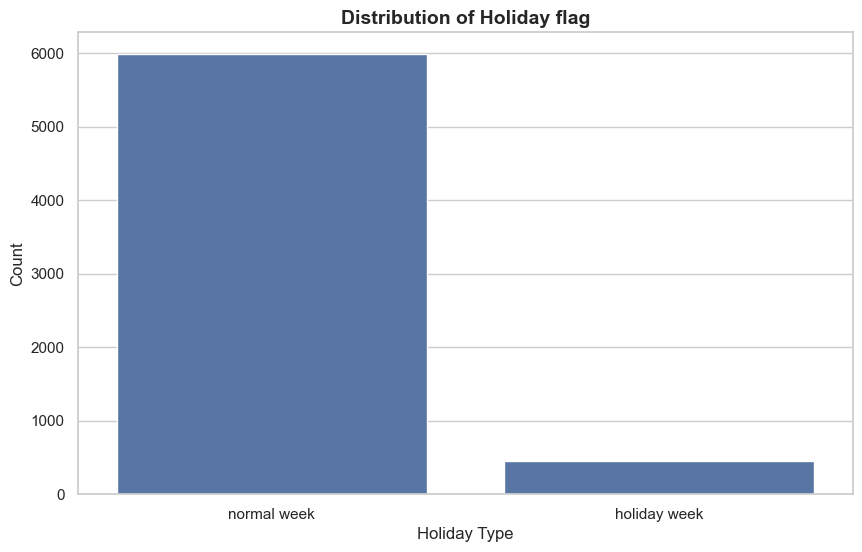

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['holiday_flag'],data=df)
plt.title("Distribution of Holiday flag",fontsize=14,fontweight='bold')
plt.xlabel('Holiday Type')
plt.ylabel("Count")
plt.show()


**Observations**
- The vast majority of weeks are classified as "normal week," while "holiday week" occurs much less frequently.
- This indicates that holidays are relatively rare events in the dataset compared to regular weeks.
- The imbalance between normal and holiday weeks should be considered in further analysis, as it may affect comparisons and modeling related to holiday effects on sales.

## Bi-Variate Analysis

## Categorical Vs Numeric


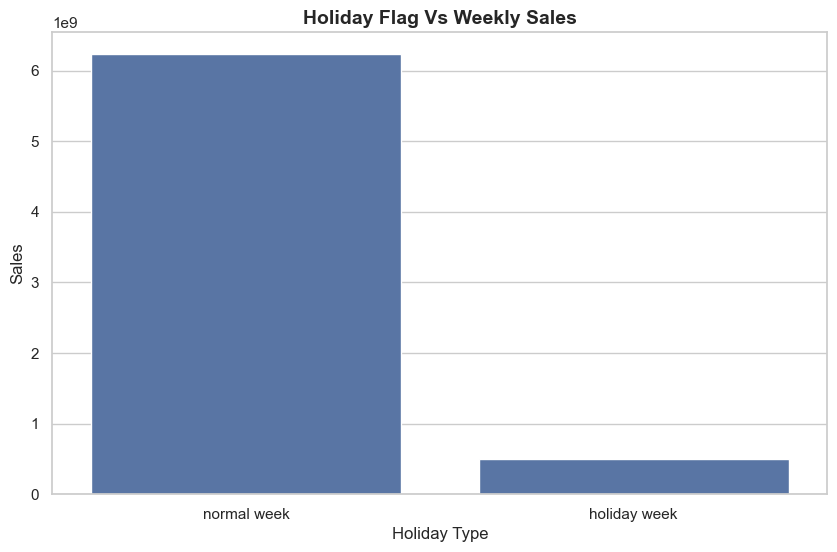

In [55]:
# Holiday flag vs weekly sales
hol_sales = df.groupby('holiday_flag')['weekly_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=hol_sales.index,y=hol_sales.values)
plt.title('Holiday Flag Vs Weekly Sales',fontsize=14,fontweight='bold')
plt.xlabel("Holiday Type")
plt.ylabel('Sales')
plt.show()

**Observations**

- Sales are higher during holiday weeks compared to normal weeks.

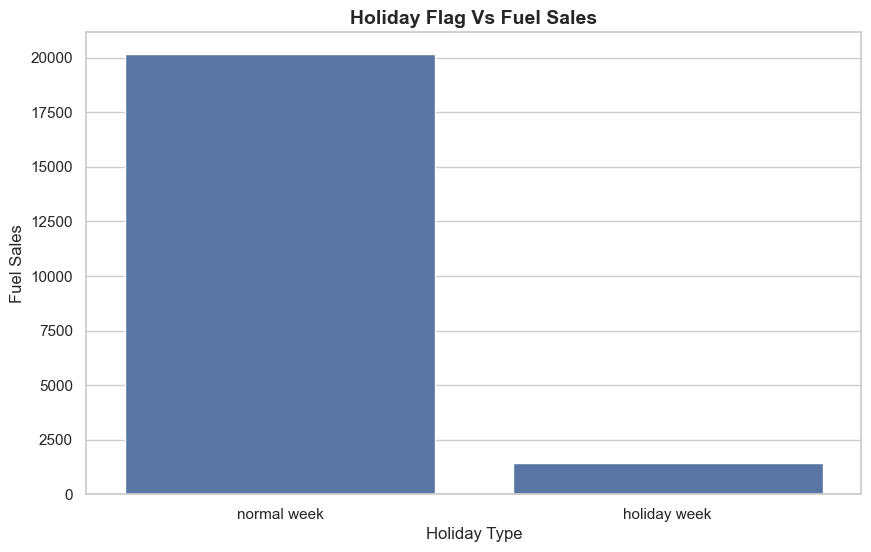

In [56]:
# Holiday flag vs fuel price
fuel_sales = df.groupby('holiday_flag')['fuel_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=fuel_sales.index,y=fuel_sales.values)
plt.title('Holiday Flag Vs Fuel Sales',fontsize=14,fontweight='bold')
plt.xlabel("Holiday Type")
plt.ylabel('Fuel Sales')
plt.show()

**Observations**
- Fuel sales are higher during normal weeks, mainly due to their greater frequency. 

## Numeric Vs Numeric


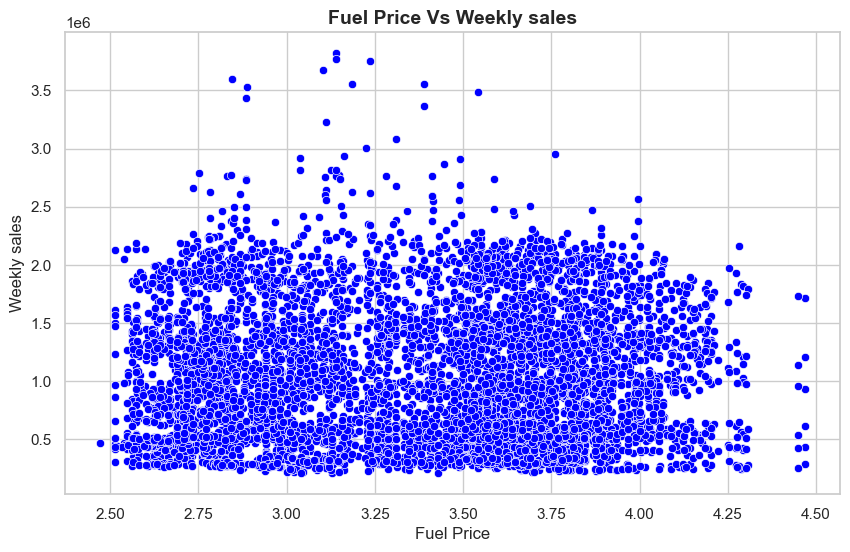

In [57]:
#Weekly sales vs Fuel Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['fuel_price'],y=df['weekly_sales'],color=('blue'),data=df)
plt.title('Fuel Price Vs Weekly sales',fontsize=14,fontweight='bold')
plt.xlabel("Fuel Price")
plt.ylabel("Weekly sales")
plt.show()

**Observations**
- There is no clear relationship between fuel price and weekly sales.

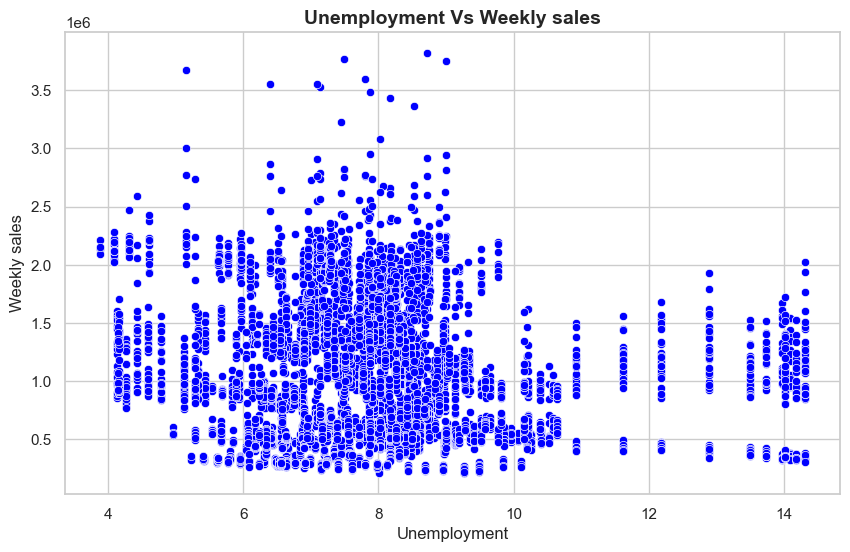

In [58]:
#Weekly sales vs Unemployment rate
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['unemployment'],y=df['weekly_sales'],color=('blue'),data=df)
plt.title('Unemployment Vs Weekly sales',fontsize=14,fontweight='bold')
plt.xlabel("Unemployment")
plt.ylabel("Weekly sales")
plt.show()

**Observations**
- Weekly sales do not show a strong trend with unemployment rate.

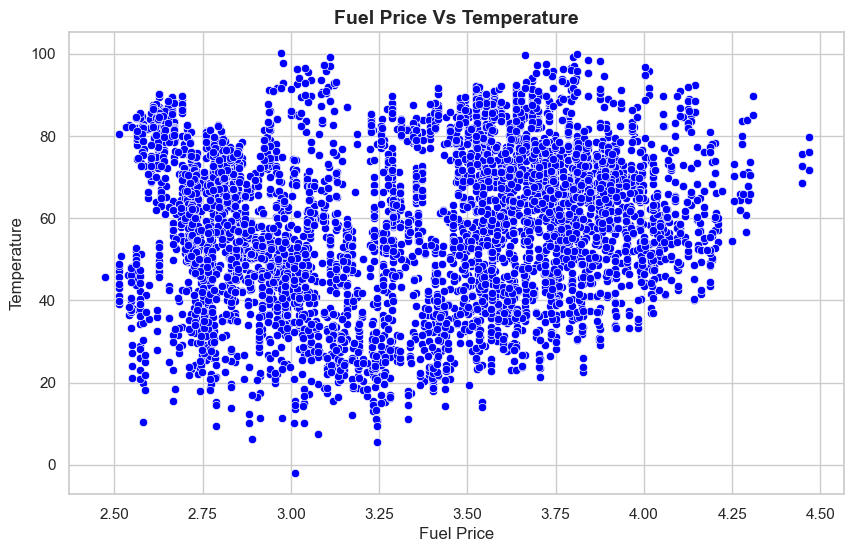

In [59]:
#Fuel Price vs Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['fuel_price'],y=df['temperature'],color=('blue'),data=df)
plt.title('Fuel Price Vs Temperature',fontsize=14,fontweight='bold')
plt.xlabel("Fuel Price")
plt.ylabel("Temperature")
plt.show()

**Observations**
- There is no clear linear relationship between fuel price and temperature. The data points are widely scattered, indicating that changes in fuel price do not directly correspond to changes in temperature.

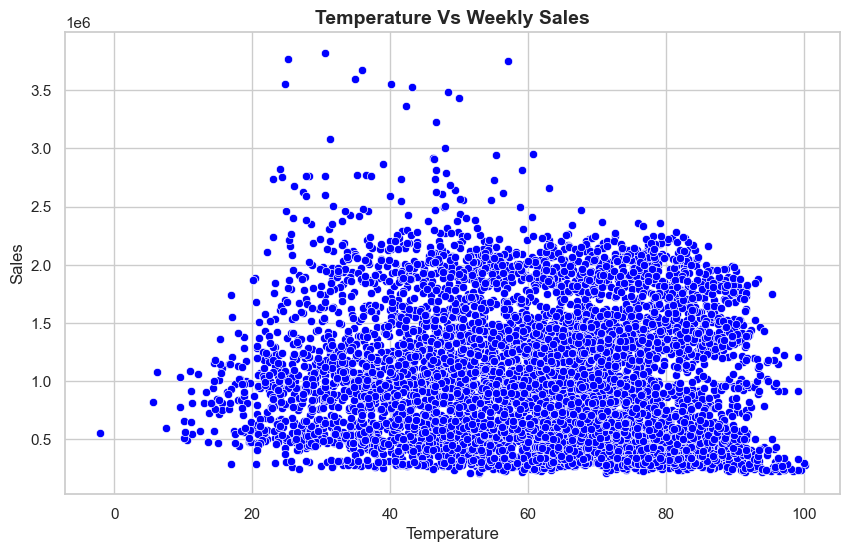

In [60]:
#Temperature Vs Weekly sales
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['temperature'],y=df['weekly_sales'],color=('blue'),data=df)
plt.title('Temperature Vs Weekly Sales',fontsize=14,fontweight='bold')
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()

**Observations**
- There is no clear linear relationship between temperature and weekly sales. Sales are distributed across all temperature ranges, suggesting that temperature does not have a strong direct impact on weekly sales.


### Seasonal Trends


#### Yearly Trends

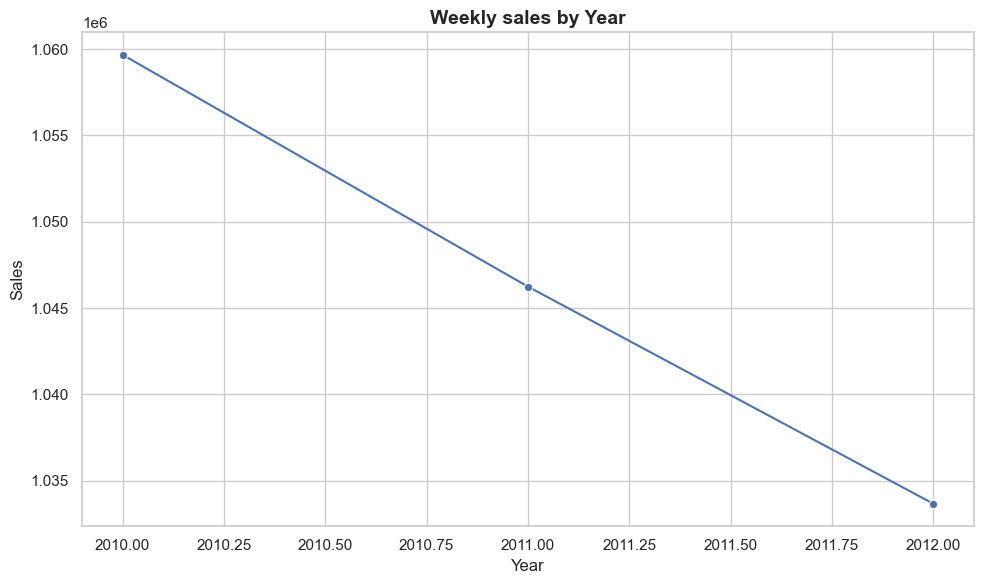

In [61]:
# Sales by year
year_sales = df.groupby('year')['weekly_sales'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_sales.index, y=year_sales.values,marker='o')
plt.title('Weekly sales by Year',fontsize=14,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
- The average weekly sales show a slight downward trend over the years, indicating a gradual decrease in sales from 2010 to 2012.

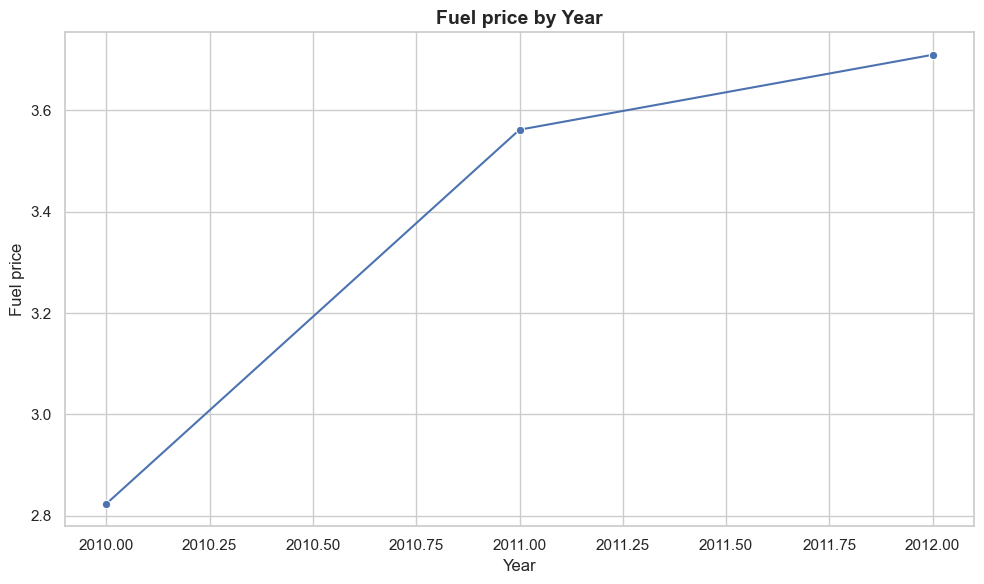

In [62]:
#Fuel price by year
fuel_sales = df.groupby('year')['fuel_price'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=fuel_sales.index, y=fuel_sales.values,marker='o')
plt.title('Fuel price by Year',fontsize=14,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Fuel price')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
- The average fuel price shows a slight increase over the years, indicating a gradual rise in fuel costs from 2010 to 2012.

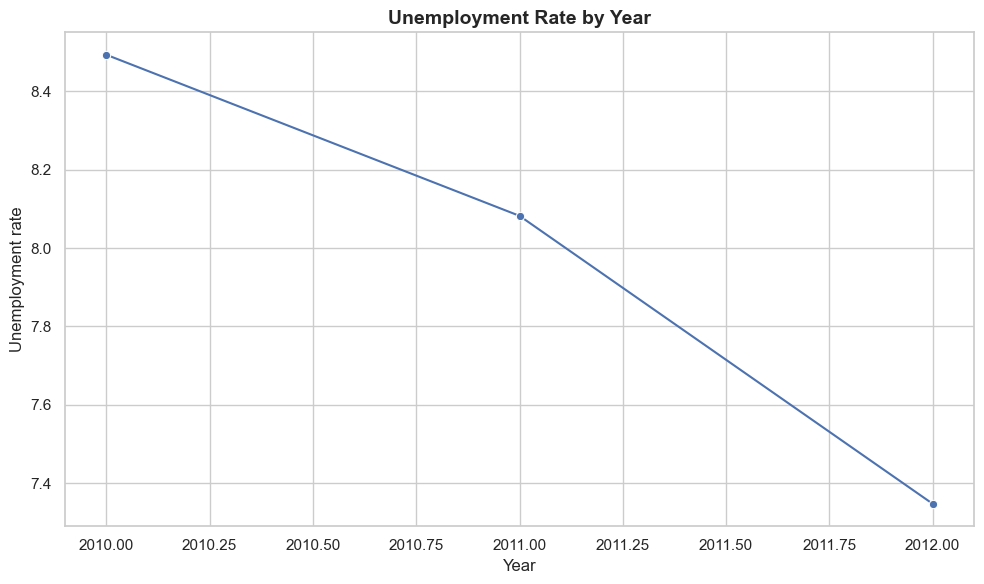

In [63]:
#Unemployment rate by year
unemployment_rt = df.groupby('year')['unemployment'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=unemployment_rt.index, y=unemployment_rt.values,marker='o')
plt.title('Unemployment Rate by Year',fontsize=14,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Unemployment rate')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
- The average unemployment rate appears relatively stable over the years, with only minor fluctuations from 2010 to 2012.

### Monthly Trends

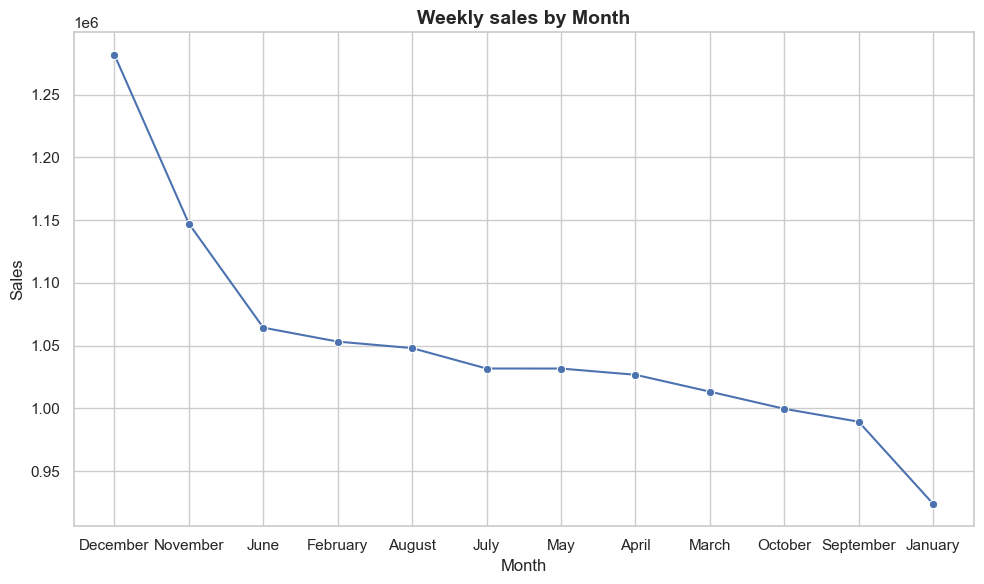

In [64]:
# Sales by month
month_sales = df.groupby('month')['weekly_sales'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_sales.index, y=month_sales.values,marker='o')
plt.title('Weekly sales by Month',fontsize=14,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
- There are noticeable peaks in average weekly sales during certain months, suggesting the presence of seasonal trends and higher sales in specific periods of the year.

## Multi-variate Analysis

## Correlation Heatmap

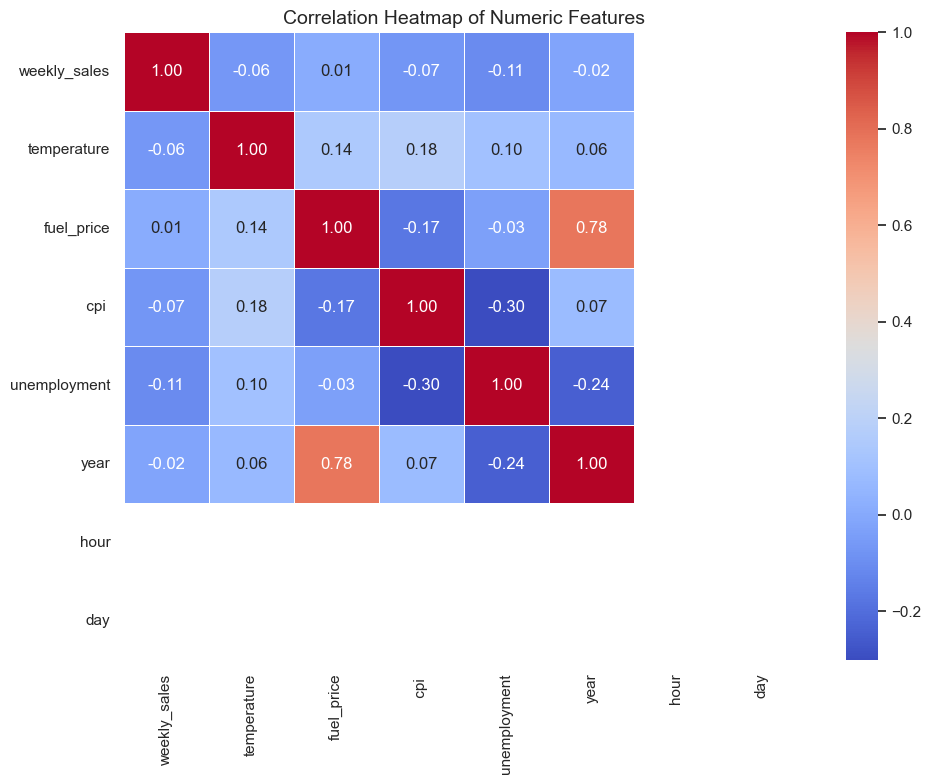

In [65]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

**Observations**
- The correlation heatmap shows that most numeric features have weak correlations with each other. There is no strong linear relationship between weekly sales and other variables, suggesting that sales are influenced by multiple factors rather than a single dominant one.

# Modeling